In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("NASDAQOMX-XQC.csv")

In [3]:
data = data.sort_values(by='Trade Date')

In [4]:
data = data.set_index('Trade Date')

In [5]:
def calculate_ema(series_y, day): 
    return series_y.ewm(span=day).mean()

In [6]:
data['EMA-12day'] = calculate_ema(data['Index Value'], 12)
data['EMA-26day'] = calculate_ema(data['Index Value'], 26)

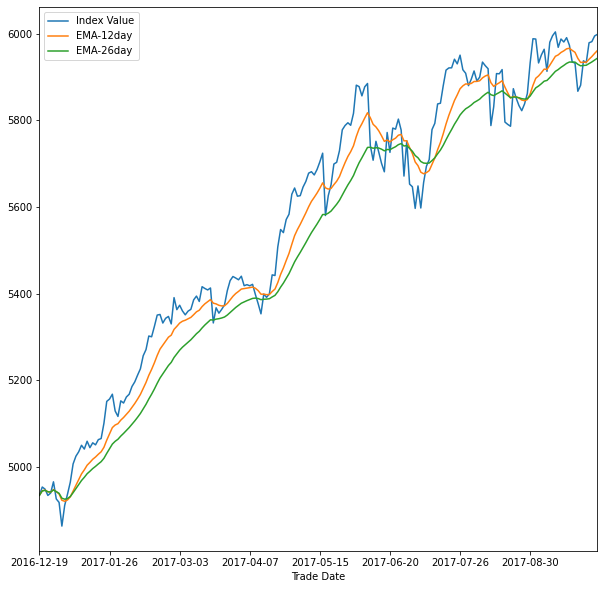

In [15]:
price_line = data[['Index Value','EMA-12day', 'EMA-26day']].head(200).plot(figsize=(10,10))

,Trade Date,Index Value,High,Low,Total Market Value,Dividend Market Value,EMA-12day,EMA-26day
880,2016-12-19,4934.85,0.0,0.0,0.0,0.0,4934.850000,4934.850000
879,2016-12-20,4953.80,0.0,0.0,0.0,0.0,4945.114583,4944.689423


In [9]:
data['Signal Line'] = data['EMA-12day'] - data['EMA-26day']

In [10]:
data['MACD(9, 12, 26)'] = calculate_ema(data['MACD-diff'], 9)

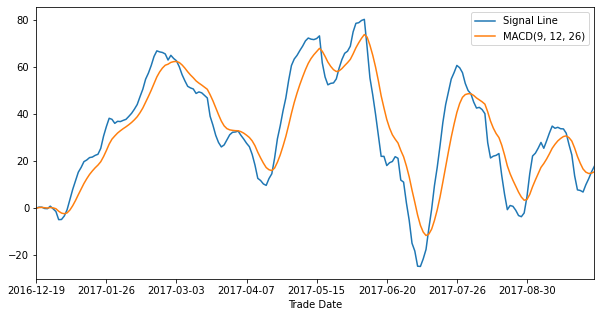

In [14]:
data[['Signal Line', 'MACD(9, 12, 26)']].head(200).plot(figsize=(10, 5))

In [12]:
data['MACD Histogram'] = data['MACD-diff'] - data['MACD(9, 12, 26)']

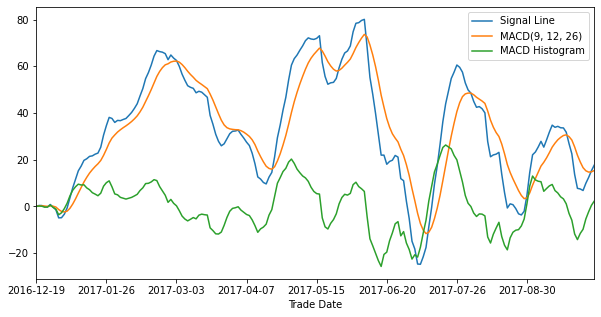

In [17]:
data[['Signal Line', 'MACD(9, 12, 26)', 'MACD Histogram']].head(200).plot(figsize=(10, 5))

In [12]:
data.head(5)

,Index Value,High,Low,Total Market Value,Dividend Market Value,EMA-12day,EMA-26day,MACD-diff,"MACD(9, 12, 26)"
Trade Date,,,,,,,,,
2016-12-19,4934.85,NaN,0.0,0.0,0.0,4934.850000,4934.850000,0.000000,0.000000
2016-12-20,4953.80,18.95,0.0,0.0,0.0,4945.114583,4944.689423,0.425160,0.236200
2016-12-21,4948.90,-4.90,0.0,0.0,0.0,4946.592032,4946.202242,0.389790,0.299147
2016-12-22,4934.39,-14.51,0.0,0.0,0.0,4942.740328,4942.900056,-0.159728,0.143701
2016-12-23,4940.02,5.63,0.0,0.0,0.0,4942.001224,4942.232159,-0.230935,0.032256


In [11]:
data['High'] = data['Index Value'].diff()

In [20]:
data['High'].where(data['High'] < 0)

Trade Date
2016-12-19      NaN
2016-12-20      NaN
2016-12-21    -4.90
2016-12-22   -14.51
2016-12-23      NaN
              ...  
2020-06-15      NaN
2020-06-16      NaN
2020-06-17      NaN
2020-06-18      NaN
2020-06-19    -3.41
Name: High, Length: 881, dtype: float64

In [27]:
data['Low'] = data['High'].where(data['High'] < 0).abs()

In [28]:
data.head()

,Index Value,High,Low,Total Market Value,Dividend Market Value,EMA-12day,EMA-26day,MACD-diff,"MACD(9, 12, 26)",Average Gain,Average Loss
Trade Date,,,,,,,,,,,
2016-12-19,4934.85,NaN,NaN,0.0,0.0,4934.850000,4934.850000,0.000000,0.000000,NaN,NaN
2016-12-20,4953.80,18.95,NaN,0.0,0.0,4945.114583,4944.689423,0.425160,0.236200,18.950000,NaN
2016-12-21,4948.90,-4.90,4.90,0.0,0.0,4946.592032,4946.202242,0.389790,0.299147,6.173214,-4.900000
2016-12-22,4934.39,-14.51,14.51,0.0,0.0,4942.740328,4942.900056,-0.159728,0.143701,-1.727844,-10.048214
2016-12-23,4940.02,5.63,NaN,0.0,0.0,4942.001224,4942.232159,-0.230935,0.032256,0.523128,-10.048214


In [23]:
data['Average Gain'] = calculate_ema(data['High'], 14)

In [24]:
data['Average Loss'] = calculate_ema(data['Low'], 14)

In [29]:
data['RS'] = data['Average Gain'] / data['Average Loss']

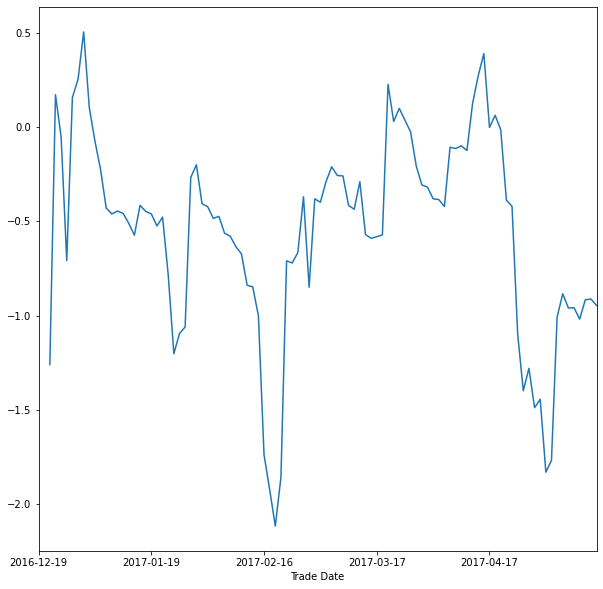

In [31]:
data['RS'].head(100).plot(figsize = (10,10))

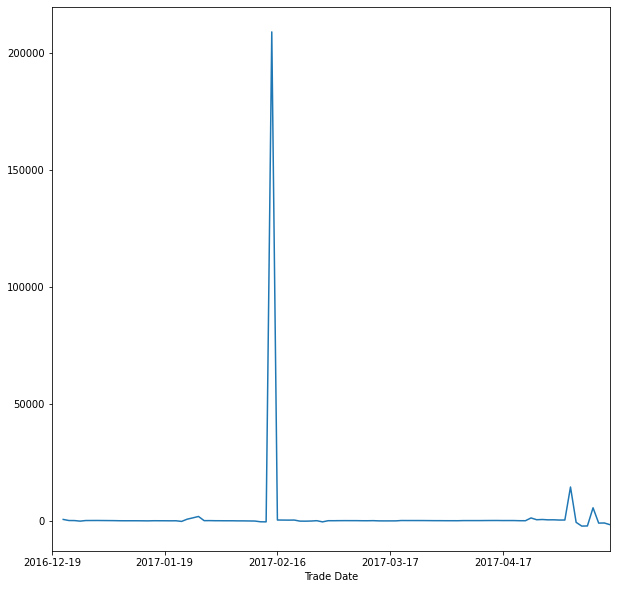

In [84]:
rsi = pd.read_excel('cs-rsi.xls')

In [67]:
rsi.head()

,Date,QQQQ Close,Change,Gain,Loss,Avg Gain,Avg Loss,RS,14-day RSI,Loss,RSI
0,2009-12-14,44.3389,0.0000,0.0000,0.0,NaN,NaN,NaN,0.0,NaN,NaN
1,2009-12-15,44.0902,-0.2487,0.0000,0.0,NaN,NaN,NaN,0.0,0.2487,NaN
2,2009-12-16,44.1497,0.0595,0.0595,0.0,NaN,NaN,NaN,0.0,NaN,NaN
3,2009-12-17,43.6124,-0.5373,0.0000,0.0,NaN,NaN,NaN,0.0,0.5373,NaN
4,2009-12-18,44.3278,0.7154,0.7154,0.0,NaN,NaN,NaN,0.0,NaN,NaN


In [85]:
rsi['Change'] = rsi['QQQQ Close'].diff()

In [69]:
rsi.head(20)

,Date,QQQQ Close,Change,Gain,Loss,Avg Gain,Avg Loss,RS,14-day RSI,Loss,RSI
0,2009-12-14,44.3389,0.0000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0
1,2009-12-15,44.0902,-0.2487,0.0000,0.0,0.000000,0.0,0.0,0.0,0.2487,0.0
2,2009-12-16,44.1497,0.0595,0.0595,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0
3,2009-12-17,43.6124,-0.5373,0.0000,0.0,0.000000,0.0,0.0,0.0,0.5373,0.0
4,2009-12-18,44.3278,0.7154,0.7154,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0
5,2009-12-21,44.8264,0.4986,0.4986,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0
6,2009-12-22,45.0955,0.2691,0.2691,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0
7,2009-12-23,45.4245,0.3290,0.3290,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0
8,2009-12-24,45.8433,0.4188,0.4188,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0
9,2009-12-28,46.0826,0.2393,0.2393,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0


In [86]:
rsi['Gain'] = rsi['Change'].where(rsi['Change'] > 0)


In [87]:
rsi = rsi.fillna(value = 0.0)

In [88]:
rsi['Loss'] = rsi['Change'].where(rsi['Change'] < 0).abs()

In [87]:
rsi.head(1)

,Date,QQQQ Close,Change,Gain,Loss,Avg Gain,Avg Loss,RS,14-day RSI,Loss
0,2009-12-14,44.3389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [89]:
rsi['Avg Gain'] = rsi['Gain'].ewm(com=14-1, min_periods=14).mean()
rsi['Avg Loss'] = rsi['Loss'].ewm(com=14-1, min_periods=14).mean()

In [90]:
rsi['RS'] = (rsi['Avg Gain'] / rsi['Avg Loss']).abs()

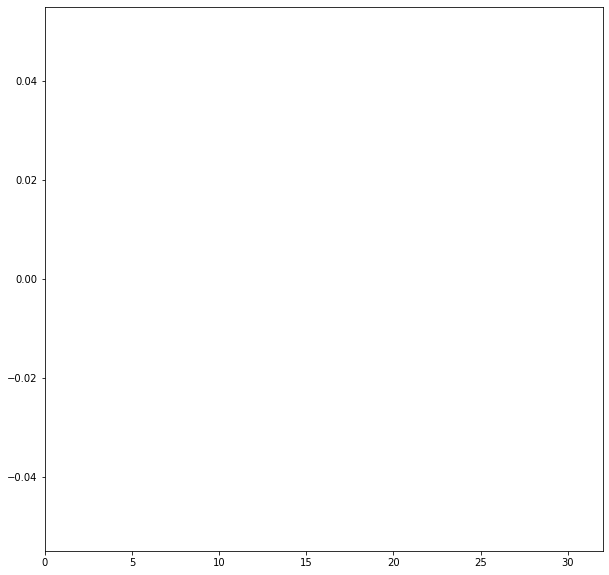

In [91]:
rsi['RS'].plot(figsize = (10,10))


In [76]:
rsi['RSI'] = 100 - (100 / (1 + rsi['RS']))

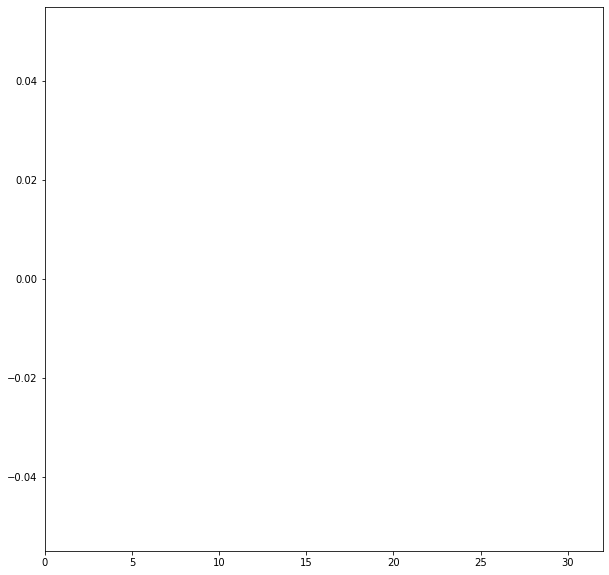

In [77]:
rsi['RSI'].plot(figsize=(10,10))

In [78]:
rsi['EMA-12day'] = calculate_ema(rsi['QQQQ Close'], 12)
rsi['EMA-26day'] = calculate_ema(rsi['QQQQ Close'], 26)

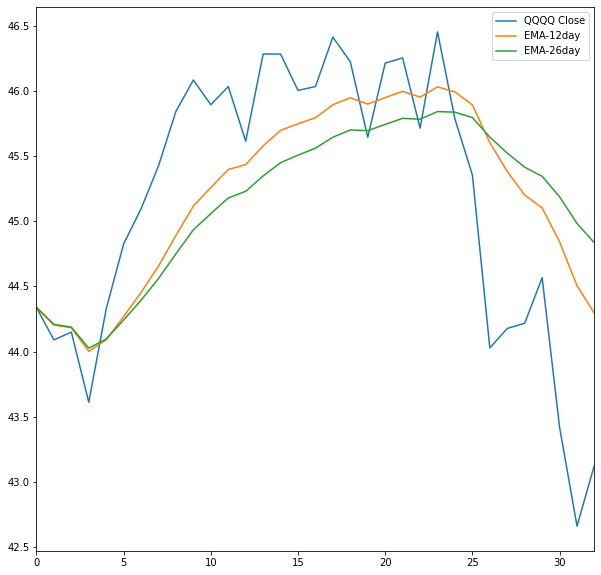

In [79]:
rsi[['QQQQ Close','EMA-12day', 'EMA-26day']].plot(figsize=(10,10))

In [35]:
rsi['Signal Line'] = rsi['EMA-12day'] - rsi['EMA-26day']
rsi['MACD Line'] = calculate_ema(rsi['Signal Line'], 9)

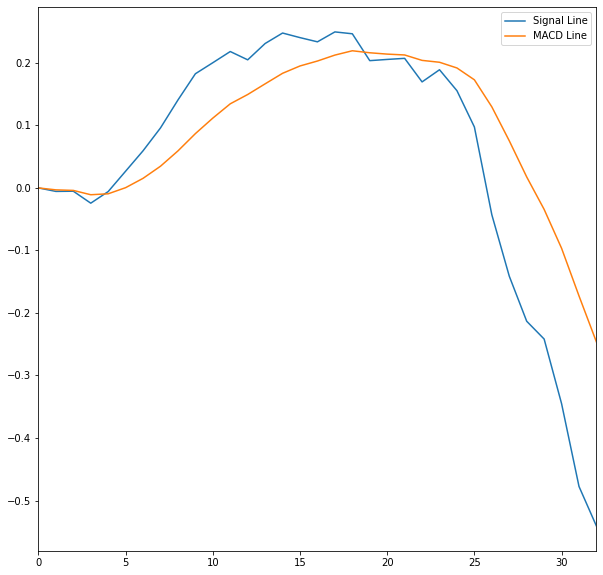

In [36]:
rsi[['Signal Line', 'MACD Line']].plot(figsize=(10,10))